In [1]:
# Import libraries
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from pandas.api.types import is_numeric_dtype

df = pd.read_csv('daily_churn_modeling-main-fe8351ed4976-2018-10-06-23-03-21.csv')
df_app_pages = pd.read_csv('daily_churn_modeling-app_pages-8646c51a401d-2018-10-05-20-51-50.csv')
df_app_tracks = pd.read_csv('daily_churn_modeling-app_tracks-e8e436d7b519-2018-10-06-22-22-12.csv')
df_site_pages = pd.read_csv('daily_churn_modeling-site_pages-8cdeac1e3b13-2018-10-05-20-56-59.csv')



In [2]:
# Data Cleaning -- Adding App Page Views Columns

#df_app_pages.head()
df_app_pages['day'] = pd.to_datetime(df_app_pages['day'])
df1= df_app_pages.set_index(['workspace_id', 'day', 'name'])
gb = df1.groupby(level=[0,1,2])

df2 = gb.agg({'count': 'sum'}).unstack(level=2).swaplevel(0, 1, 1).sort_index(1)
df2.columns = df2.columns.to_series().apply(lambda x: '{}_page_view_{}'.format(*x))
df2 = df2.reset_index()


df['date'] = pd.to_datetime(df['date'])
df['date_1before'] = df['date'] + pd.Timedelta(days=-1)




df = pd.merge(df, df2,  how='left', left_on=['workspace_id','date'], right_on=['workspace_id','day'])

df2.columns = [str(col) + '_day_before' for col in df2.columns]

df = pd.merge(df, df2,  how='left', left_on=['workspace_id','date_1before'], right_on=['workspace_id_day_before','day_day_before'])

df = df.drop(['workspace_id_day_before', 'day_day_before'], axis=1)

df.columns = df.columns.to_series().apply(lambda x: x.decode('utf-8').strip() )

In [3]:
# Data Cleaning -- Adding App Tracks Views Columns

#df_app_pages.head()
df_app_tracks['day'] = pd.to_datetime(df_app_tracks['day'])
df1= df_app_tracks.set_index(['workspace_id', 'day', 'event'])
gb = df1.groupby(level=[0,1,2])

df2 = gb.agg({'count': 'sum'}).unstack(level=2).swaplevel(0, 1, 1).sort_index(1)
df2.columns = df2.columns.to_series().apply(lambda x: '{}_event_{}'.format(*x))
df2 = df2.reset_index()


#df['date'] = pd.to_datetime(df['date'])
#df['date_1before'] = df['date'] + pd.Timedelta(days=-1)




df = pd.merge(df, df2,  how='left', left_on=['workspace_id','date'], right_on=['workspace_id','day'])

df2.columns = [str(col) + '_day_before' for col in df2.columns]

df = pd.merge(df, df2,  how='left', left_on=['workspace_id','date_1before'], right_on=['workspace_id_day_before','day_day_before'])

df = df.drop(['workspace_id_day_before', 'day_day_before'], axis=1)

df.columns = df.columns.to_series().apply(lambda x: x.decode('utf-8').strip() )

In [4]:
# Data Cleaning -- Adding Site Page Views Columns
#df_app_pages.head()
df_site_pages['day'] = pd.to_datetime(df_site_pages['day'])
df1= df_site_pages.set_index(['workspace_id', 'day', 'name'])
gb = df1.groupby(level=[0,1,2])

df2 = gb.agg({'count': 'sum'}).unstack(level=2).swaplevel(0, 1, 1).sort_index(1)
df2.columns = df2.columns.to_series().apply(lambda x: '{}_page_view_{}'.format(*x))
df2 = df2.reset_index()


#df['date'] = pd.to_datetime(df['date'])
#df['date_1before'] = df['date'] + pd.Timedelta(days=-1)




df = pd.merge(df, df2,  how='left', left_on=['workspace_id','date'], right_on=['workspace_id','day'])

df2.columns = [str(col) + '_day_before' for col in df2.columns]

df = pd.merge(df, df2,  how='left', left_on=['workspace_id','date_1before'], right_on=['workspace_id_day_before','day_day_before'])

df = df.drop(['workspace_id_day_before', 'day_day_before'], axis=1)

df.columns = df.columns.to_series().apply(lambda x: x.decode('utf-8').strip() )

/Users/christoper/anaconda2/lib/python2.7/site-packages/pandas/core/indexes/base.py:2598: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  indexer = self._engine.get_indexer(target._values)
/Users/christoper/anaconda2/lib/python2.7/site-packages/pandas/core/indexes/base.py:1642: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  return key in self._engine
/Users/christoper/anaconda2/lib/python2.7/site-packages/pandas/core/indexes/base.py:1261: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  return self._engine.is_unique


In [5]:
for x in df.columns: 
    print x

workspace_id
slug
time_period_duplicate_column_name_1
date
age_of_workspace_in_days
time_period
revenue_churn
revenue_churn_lag
seats
all_sources_count
all_destinations_count
api_calls
warehouse_destination_count
perc_change_seats
perc_change_all_sources_count
perc_change_all_destinations_count
perc_change_api_calls_1d
perc_change_warehouse_desintaion_count
date_1before
day_x
Activity_page_view_count
Audiences_page_view_count
Billing Card_page_view_count
Billing Extra Info_page_view_count
Billing Payment History_page_view_count
Billing Plan_page_view_count
Billing Usage_page_view_count
Customers_page_view_count_x
Customers Connect_page_view_count
Customers Destinations_page_view_count
Destination Deliverability Viewed_page_view_count
Destination Error Viewed_page_view_count
Destination Errors Viewed_page_view_count
Destination Simulator_page_view_count
Destination Status Viewed_page_view_count
Notifications_page_view_count
Overview_page_view_count
Personas Audience Viewed_page_view_cou

Growth Labs_page_view_count_day_before
Growth Marketer's Toolbox Landing Page_page_view_count_day_before
Hello_page_view_count_day_before
Help_page_view_count_day_before
Help Contact_page_view_count_day_before
Home_page_view_count_day_before
Homepage_page_view_count_day_before
IBM Customer Story_page_view_count_day_before
Industry - Mobile_page_view_count_day_before
Industry - Retail_page_view_count_day_before
Industry Landing_page_view_count_day_before
Industry Marketplaces_page_view_count_day_before
Industry Marketplaces=_page_view_count_day_before
Instacart Customer Story_page_view_count_day_before
Integration Page_page_view_count_day_before
Integration Partners_page_view_count_day_before
Integrations Landing_page_view_count_day_before
Jobs_page_view_count_day_before
Machine Learning LP_page_view_count_day_before
Mobile_page_view_count_day_before
Mobile App Readiness_page_view_count_day_before
Mobile App Retention Recipe_page_view_count_day_before
New Apps Guide_page_view_count_day_

In [6]:
df_og = df

In [7]:
df_og.groupby('subscription_plan_downgraded_event_count').workspace_id.nunique()

subscription_plan_downgraded_event_count
1.0    47
2.0     1
3.0     1
Name: workspace_id, dtype: int64

In [8]:
#Drop columns that we don't want in model
df = df.drop(['workspace_id','slug', 'time_period_duplicate_column_name_1', 'time_period', 'date', 'day', 'date_1before', 'day_x', 'day_y'], axis=1)

# Data Cleaning -- adding dummy variables
for x in df.columns:
    if is_numeric_dtype(df[x])==False:
        df = pd.concat([df,pd.get_dummies(df[x], prefix=x,dummy_na=True)],axis=1).drop([x],axis=1)
#df.dtypes
#pd.get_dummies(df['referral_source'],prefix='rs_')

# Data Cleaning -- fill nulls with 0s
df = df.fillna(0)

In [9]:
df['churned'] = ((df.subscription_plan_changed_event_count>0) | (df.workspace_deleted_event_count>0) | (df.subscription_plan_downgraded_event_count>0) | (df.survey_viewed_event_count>0))\
                    & ((df.revenue_churn>0) | (df.revenue_churn_lag>0))
df = df.drop(['subscription_plan_changed_event_count', 'workspace_deleted_event_count', 'revenue_churn', 'revenue_churn_lag',\
             'workspace_delete_clicked_event_count', 'lockout_modal_shown_event_count', 'subscription_plan_downgraded_event_count',\
             'survey_completed_event_count', 'survey_viewed_event_count', 'survey_closed_event_count', 'subscription_plan_clicked_event_count' ], axis=1)
#and event !='survey_completed' and event != 'survey_viewed' and event !='survey_closed'
#and event != 'subscription_plan_clicked' and event != 'subscription_plan_change_error'


In [10]:
# Extract feature (X) and target (y) columns
feature_cols = list(df.loc[:, df.columns != 'churned']) 
target_col = list(df.loc[:, df.columns == 'churned'])
print ("Feature column(s):-\n{}".format(feature_cols))
print ("Target column: {}".format(target_col))

X_all = df[feature_cols]  # feature values
y_all = df[target_col]  # corresponding targets/labels
print ("\nFeature values:-")
print (X_all.head())  # print the first 5 rows
print (y_all.head())  # print the first 5 rows

Feature column(s):-
[u'age_of_workspace_in_days', u'seats', u'all_sources_count', u'all_destinations_count', u'api_calls', u'warehouse_destination_count', u'perc_change_seats', u'perc_change_all_sources_count', u'perc_change_all_destinations_count', u'perc_change_api_calls_1d', u'perc_change_warehouse_desintaion_count', u'Activity_page_view_count', u'Audiences_page_view_count', u'Billing Card_page_view_count', u'Billing Extra Info_page_view_count', u'Billing Payment History_page_view_count', u'Billing Plan_page_view_count', u'Billing Usage_page_view_count', u'Customers_page_view_count_x', u'Customers Connect_page_view_count', u'Customers Destinations_page_view_count', u'Destination Deliverability Viewed_page_view_count', u'Destination Error Viewed_page_view_count', u'Destination Errors Viewed_page_view_count', u'Destination Simulator_page_view_count', u'Destination Status Viewed_page_view_count', u'Notifications_page_view_count', u'Overview_page_view_count', u'Personas Audience Viewed_


Feature values:-
   age_of_workspace_in_days  seats  all_sources_count  all_destinations_count  \
0                       169      1                  6                      10   
1                       170      1                  6                      10   
2                       171      1                  6                      10   
3                       172      1                  6                      10   
4                       173      1                  6                      10   

   api_calls  warehouse_destination_count  perc_change_seats  \
0       1078                            1                  0   
1          0                            1                  0   
2       1346                            1                  0   
3        981                            1                  0   
4        782                            1                  0   

   perc_change_all_sources_count  perc_change_all_destinations_count  \
0                              0      

In [11]:
# First, decide how many training vs test samples you want
num_all = df.shape[0]  # same as len(service_data)
num_train = 0.75  # 75% of the data
num_test = 1 - num_train
print num_all, num_train, num_test

1648300 0.75 0.25


In [12]:
# TODO: Then, select features (X) and corresponding labels (y) for the training and test sets
# Note: Shuffle the data or randomly select samples to avoid any bias due to ordering in the dataset

from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, train_size = num_train, random_state = 47)

print ("Training set: {} samples".format(X_train.shape[0]))
print ("Test set: {} samples".format(X_test.shape[0]))
# Note: If you need a validation set, extract it from within training data

/Users/christoper/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Training set: 1236225 samples
Test set: 412075 samples


In [13]:
#I will use this code to run different predictive models
#It will print result by itself

# Import required libraries
import time
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Train a model
def train_classifier(clf, X_train, y_train):
    print ("Training {}...".format(clf.__class__.__name__))
    start = time.time()
    clf.fit(X_train, y_train)
    end = time.time()
    print ("Done! Training time (secs): {:.3f}".format(end - start))

# Use trained model to predict labels and compute accuracy metrics
def predict_labels(clf, features, target):
    print( "Predicting labels using {}...".format(clf.__class__.__name__))
    start = time.time()
    y_pred = clf.predict(features)
    end = time.time()
    print ("Done! Prediction time (secs): {:.3f}".format(end - start))
    print ("F1 score: {:,.3f}".format(f1_score(target, y_pred, pos_label=1)), \
        "Precision: {:,.3f}".format(precision_score(target, y_pred, pos_label=1)), \
        "Recall: {:,.3f}".format(recall_score(target, y_pred, pos_label=1)))

#I will use this code to run predictive models on different training sets / for different paraneters
#It will return key parameters and will not print them autmatically

# Train a model
def train_classifier_v2(clf, X_train, y_train):
    clf.fit(X_train, y_train)

# Use trained model to predict labels and compute accuracy metrics
def predict_labels_v2(clf, features, target):
    y_pred = clf.predict(features)
    return f1_score(target, y_pred, pos_label=1)
    

In [14]:
# model 2: DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=4)

train_classifier(clf, X_train, y_train)
print (clf)

#Assessing Model Acuracy
print ()
print ("Assessing Model Acuracy on the training set")
predict_labels(clf, X_train, y_train) 

print ()
print ("Assessing Model Acuracy on the test set")
predict_labels(clf, X_test, y_test) 

Training DecisionTreeClassifier...
Done! Training time (secs): 65.721
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
()
Assessing Model Acuracy on the training set
Predicting labels using DecisionTreeClassifier...
Done! Prediction time (secs): 37.719
('F1 score: 0.145', 'Precision: 0.935', 'Recall: 0.078')
()
Assessing Model Acuracy on the test set
Predicting labels using DecisionTreeClassifier...
Done! Prediction time (secs): 6.483
('F1 score: 0.145', 'Precision: 0.600', 'Recall: 0.083')


()
Assessing Model Acuracy on the training set
Predicting labels using DecisionTreeClassifier...
Done! Prediction time (secs): 38.421
('F1 score: 0.145', 'Precision: 0.935', 'Recall: 0.078')
()
Assessing Model Acuracy on the test set
Predicting labels using DecisionTreeClassifier...
Done! Prediction time (secs): 5.444
('F1 score: 0.145', 'Precision: 0.600', 'Recall: 0.083')
()
Feature importance (zeros were excluded) 
('  ', 4, u'api_calls', ', importance: 0.222')
('  ', 71, u'Workspace Settings Basic_page_view_count', ', importance: 0.072')
('  ', 73, u'Workspace Settings Notifications_page_view_count', ', importance: 0.017')
('  ', 75, u'Workspace Settings Plans_page_view_count', ', importance: 0.134')
('  ', 193, u'credit_card_dialog_closed_event_count', ', importance: 0.023')
('  ', 250, u'integration_disabled_event_count', ', importance: 0.052')
('  ', 375, u'signup_next_clicked_event_count', ', importance: 0.120')
('  ', 426, u'subscription_plan_change_error_event_count', ', impo

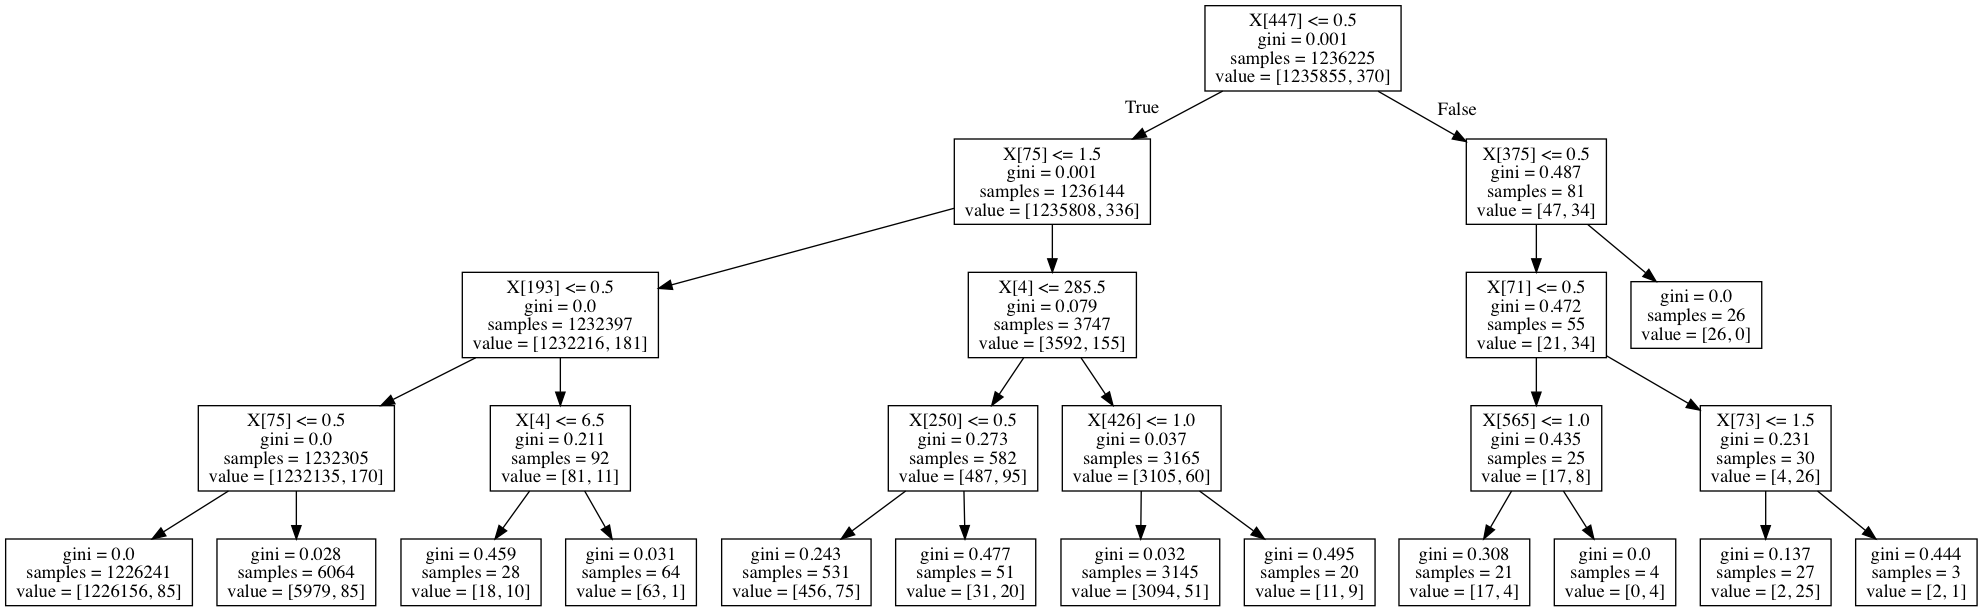

In [15]:

clf = DecisionTreeClassifier(max_depth = 4)



train_classifier_v2(clf, X_train, y_train)

print ()
print ("Assessing Model Acuracy on the training set")
predict_labels(clf, X_train, y_train) 

print ()
print ("Assessing Model Acuracy on the test set")
predict_labels(clf, X_test, y_test) 

# Print parameter importance
print ()
print ("Feature importance (zeros were excluded) ")
for i, f in enumerate( clf.feature_importances_) :
    if f > 0:
        print ("  ", i, X_all.columns[i], ", importance: {:,.3f}".format(f))

# Visualizaing Decision Tree Classifier after the training
from sklearn.externals.six import StringIO
from sklearn import tree
import pydot
from IPython.display import Image 

dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data)
(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

()
Assessing Model Acuracy on the training set
Predicting labels using DecisionTreeClassifier...
Done! Prediction time (secs): 33.573
('F1 score: 0.274', 'Precision: 0.813', 'Recall: 0.165')
()
Assessing Model Acuracy on the test set
Predicting labels using DecisionTreeClassifier...
Done! Prediction time (secs): 5.412
('F1 score: 0.175', 'Precision: 0.429', 'Recall: 0.110')
()
Feature importance (zeros were excluded) 
('  ', 4, u'api_calls', ', importance: 0.173')
('  ', 9, u'perc_change_api_calls_1d', ', importance: 0.049')
('  ', 37, u'Source Settings Basic_page_view_count', ', importance: 0.009')
('  ', 71, u'Workspace Settings Basic_page_view_count', ', importance: 0.081')
('  ', 73, u'Workspace Settings Notifications_page_view_count', ', importance: 0.013')
('  ', 75, u'Workspace Settings Plans_page_view_count', ', importance: 0.146')
('  ', 83, u'Billing Extra Info_page_view_count_day_before', ', importance: 0.014')
('  ', 193, u'credit_card_dialog_closed_event_count', ', importa

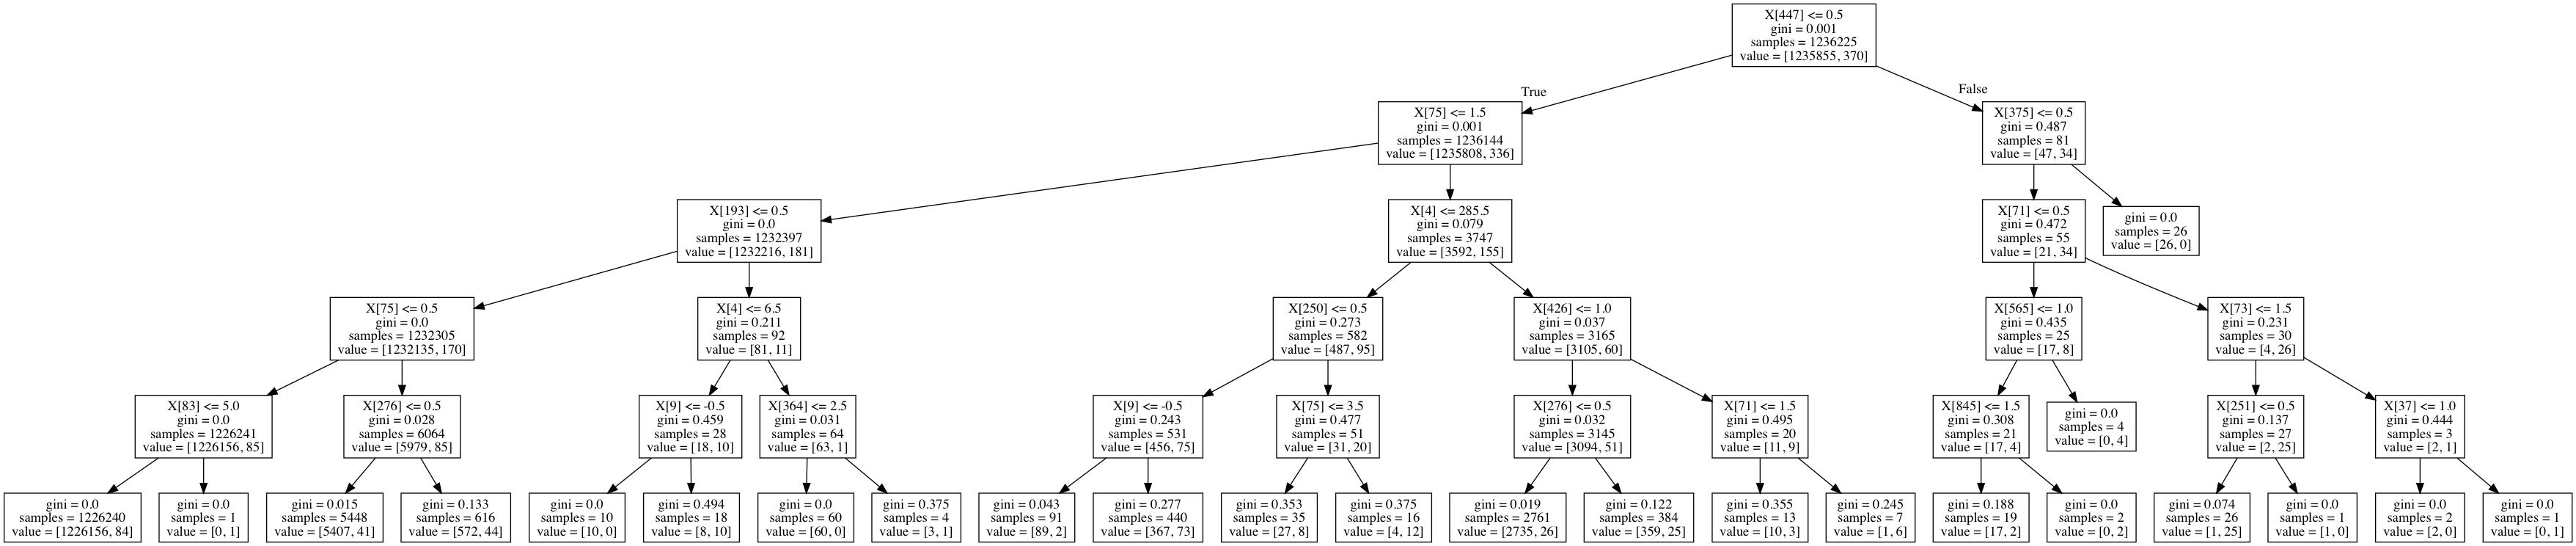

In [16]:

clf = DecisionTreeClassifier(max_depth = 5)



train_classifier_v2(clf, X_train, y_train)

print ()
print ("Assessing Model Acuracy on the training set")
predict_labels(clf, X_train, y_train) 

print ()
print ("Assessing Model Acuracy on the test set")
predict_labels(clf, X_test, y_test) 

# Print parameter importance
print ()
print ("Feature importance (zeros were excluded) ")
for i, f in enumerate( clf.feature_importances_) :
    if f > 0:
        print ("  ", i, X_all.columns[i], ", importance: {:,.3f}".format(f))

# Visualizaing Decision Tree Classifier after the training
from sklearn.externals.six import StringIO
from sklearn import tree
import pydot
from IPython.display import Image 

dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data)
(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

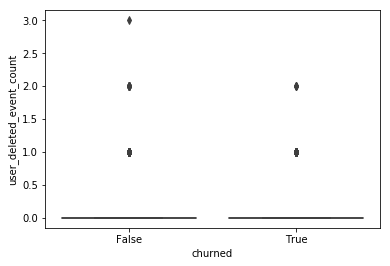

In [17]:

sns.boxplot(x="churned", y="user_deleted_event_count",
            data=df)



In [18]:
df.groupby('churned')['user_deleted_event_count'].describe()

,count,mean,std,min,25%,50%,75%,max
churned,,,,,,,,
False,1647821.0,0.000052,0.008317,0.0,0.0,0.0,0.0,3.0
True,479.0,0.102296,0.329788,0.0,0.0,0.0,0.0,2.0


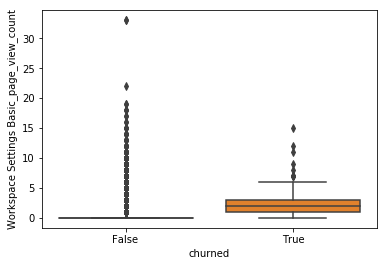

In [19]:
sns.boxplot(x="churned", y="Workspace Settings Basic_page_view_count",
            data=df)




()
Assessing Model Acuracy on the training set
Predicting labels using DecisionTreeClassifier...
Done! Prediction time (secs): 32.331
('F1 score: 0.333', 'Precision: 0.874', 'Recall: 0.205')
()
Assessing Model Acuracy on the test set
Predicting labels using DecisionTreeClassifier...
Done! Prediction time (secs): 5.556
('F1 score: 0.213', 'Precision: 0.469', 'Recall: 0.138')
()
Feature importance (zeros were excluded) 
('  ', 0, u'age_of_workspace_in_days', ', importance: 0.046')
('  ', 4, u'api_calls', ', importance: 0.161')
('  ', 9, u'perc_change_api_calls_1d', ', importance: 0.057')
('  ', 69, u'Workspace Settings_page_view_count', ', importance: 0.009')
('  ', 71, u'Workspace Settings Basic_page_view_count', ', importance: 0.063')
('  ', 73, u'Workspace Settings Notifications_page_view_count', ', importance: 0.010')
('  ', 75, u'Workspace Settings Plans_page_view_count', ', importance: 0.123')
('  ', 83, u'Billing Extra Info_page_view_count_day_before', ', importance: 0.011')
('  '

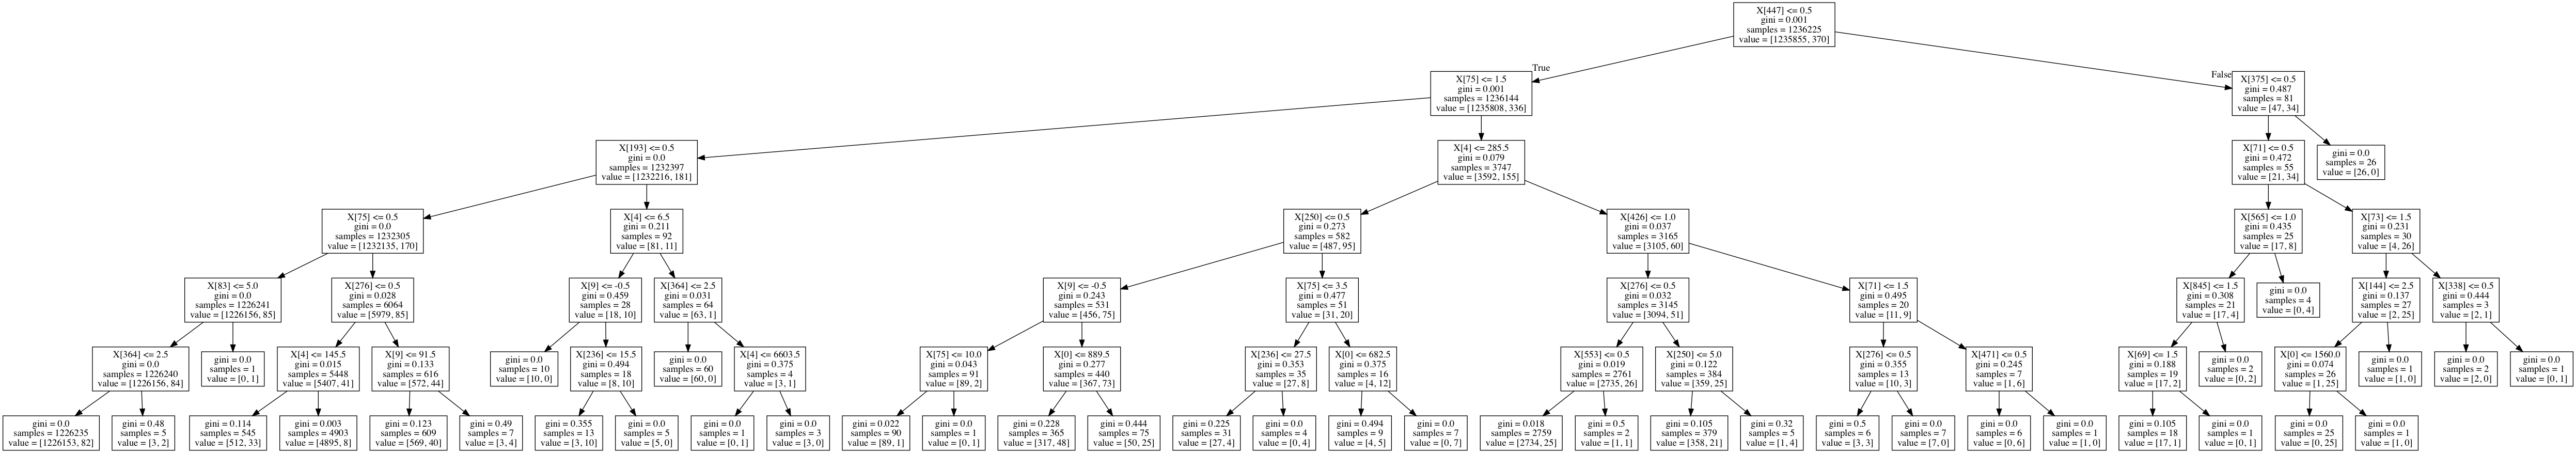

In [20]:

clf = DecisionTreeClassifier(max_depth = 6)



train_classifier_v2(clf, X_train, y_train)

print ()
print ("Assessing Model Acuracy on the training set")
predict_labels(clf, X_train, y_train) 

print ()
print ("Assessing Model Acuracy on the test set")
predict_labels(clf, X_test, y_test) 

# Print parameter importance
print ()
print ("Feature importance (zeros were excluded) ")
for i, f in enumerate( clf.feature_importances_) :
    if f > 0:
        print ("  ", i, X_all.columns[i], ", importance: {:,.3f}".format(f))

# Visualizaing Decision Tree Classifier after the training
from sklearn.externals.six import StringIO
from sklearn import tree
import pydot
from IPython.display import Image 

dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data)
(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

()
Assessing Model Acuracy on the training set
Predicting labels using DecisionTreeClassifier...
Done! Prediction time (secs): 33.253
('F1 score: 0.375', 'Precision: 0.966', 'Recall: 0.232')
()
Assessing Model Acuracy on the test set
Predicting labels using DecisionTreeClassifier...
Done! Prediction time (secs): 6.024
('F1 score: 0.187', 'Precision: 0.433', 'Recall: 0.119')
()
Feature importance (zeros were excluded) 
('  ', 0, u'age_of_workspace_in_days', ', importance: 0.032')
('  ', 2, u'all_sources_count', ', importance: 0.008')
('  ', 4, u'api_calls', ', importance: 0.141')
('  ', 6, u'perc_change_seats', ', importance: 0.008')
('  ', 9, u'perc_change_api_calls_1d', ', importance: 0.061')
('  ', 69, u'Workspace Settings_page_view_count', ', importance: 0.019')
('  ', 71, u'Workspace Settings Basic_page_view_count', ', importance: 0.054')
('  ', 73, u'Workspace Settings Notifications_page_view_count', ', importance: 0.017')
('  ', 74, u'Workspace Settings Payments_page_view_count',

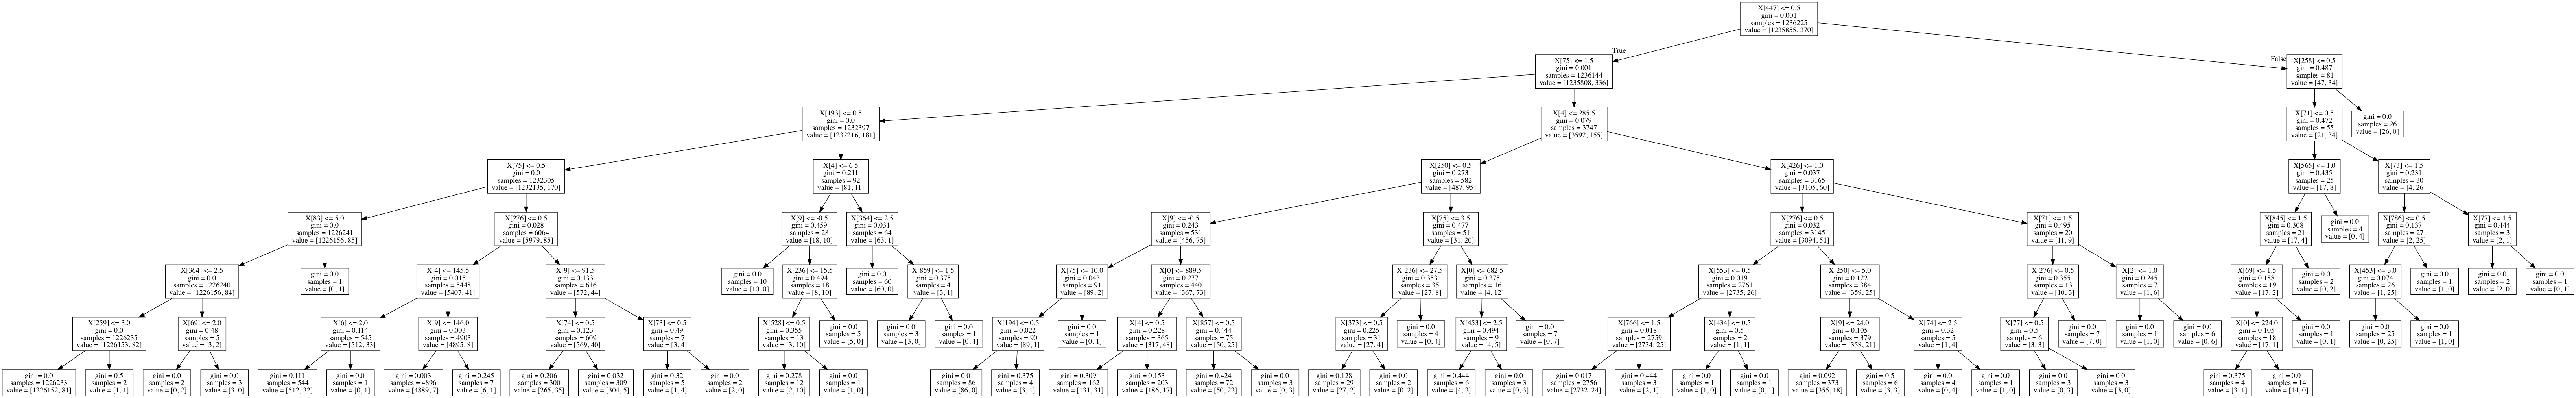

In [21]:

clf = DecisionTreeClassifier(max_depth = 7)



train_classifier_v2(clf, X_train, y_train)

print ()
print ("Assessing Model Acuracy on the training set")
predict_labels(clf, X_train, y_train) 

print ()
print ("Assessing Model Acuracy on the test set")
predict_labels(clf, X_test, y_test) 

# Print parameter importance
print ()
print ("Feature importance (zeros were excluded) ")
for i, f in enumerate( clf.feature_importances_) :
    if f > 0:
        print ("  ", i, X_all.columns[i], ", importance: {:,.3f}".format(f))

# Visualizaing Decision Tree Classifier after the training
from sklearn.externals.six import StringIO
from sklearn import tree
import pydot
from IPython.display import Image 

dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data)
(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

()
Assessing Model Acuracy on the training set
Predicting labels using DecisionTreeClassifier...
Done! Prediction time (secs): 35.275
('F1 score: 0.425', 'Precision: 0.990', 'Recall: 0.270')
()
Assessing Model Acuracy on the test set
Predicting labels using DecisionTreeClassifier...
Done! Prediction time (secs): 5.565
('F1 score: 0.200', 'Precision: 0.366', 'Recall: 0.138')
()
Feature importance (zeros were excluded) 
('  ', 0, u'age_of_workspace_in_days', ', importance: 0.053')
('  ', 2, u'all_sources_count', ', importance: 0.001')
('  ', 4, u'api_calls', ', importance: 0.136')
('  ', 5, u'warehouse_destination_count', ', importance: 0.012')
('  ', 6, u'perc_change_seats', ', importance: 0.007')
('  ', 9, u'perc_change_api_calls_1d', ', importance: 0.060')
('  ', 37, u'Source Settings Basic_page_view_count', ', importance: 0.008')
('  ', 41, u'Source Settings Move_page_view_count', ', importance: 0.007')
('  ', 68, u'Workspace Overview_page_view_count', ', importance: 0.012')
('  ', 6

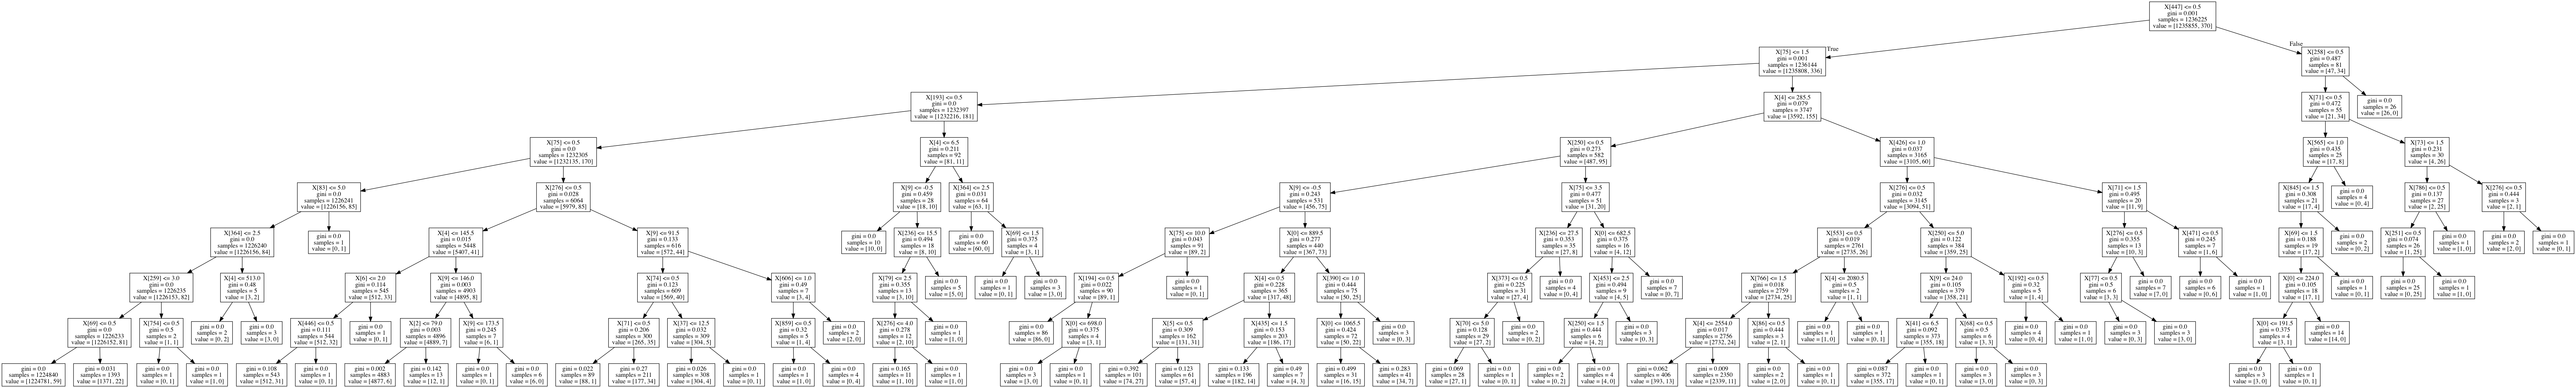

In [22]:

clf = DecisionTreeClassifier(max_depth = 8)



train_classifier_v2(clf, X_train, y_train)

print ()
print ("Assessing Model Acuracy on the training set")
predict_labels(clf, X_train, y_train) 

print ()
print ("Assessing Model Acuracy on the test set")
predict_labels(clf, X_test, y_test) 

# Print parameter importance
print ()
print ("Feature importance (zeros were excluded) ")
for i, f in enumerate( clf.feature_importances_) :
    if f > 0:
        print ("  ", i, X_all.columns[i], ", importance: {:,.3f}".format(f))

# Visualizaing Decision Tree Classifier after the training
from sklearn.externals.six import StringIO
from sklearn import tree
import pydot
from IPython.display import Image 

dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data)
(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())